#Exercise 01 of the course 01ZLMA. 

## Contents
*text kurzívou*

*   Recap of multivariable linear regression (FJFI course 01RAD)
*   Discussion about organizational/run of the course
*   Introdaction into Google colab notebooks (R version https://colab.to/r or Python versions)
* Exponential type distributions


To load required libraries (with R runtime type):


In [ ]:
#cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
#cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse","MASS","knitr", "GGally", "reactable","gridExtra") # 
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

#For sure: set dplyr functions
select    <- dplyr::select;
rename    <- dplyr::rename;
mutate    <- dplyr::mutate; 
summarize <- dplyr::summarize;
arrange   <- dplyr::arrange;
slice     <- dplyr::slice;
filter    <- dplyr::filter;
recode    <- dplyr::recode

[1] "GGally"    "reactable" "gridExtra"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’, ‘htmlwidgets’, ‘reactR’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "knitr"     "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "GGally"    "knitr"     "MASS"      "forcats"   "stringr"   "dplyr"    
 [7] "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse"
[13] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[19] "base"     

[[5]]
 [1] "reactable" "GGally"    "knitr"     "MASS"      "forcats"   "stringr"  
 [7] "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"    "ggplot2"  
[13] "tidyverse" "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[19] "methods"   "base"     

[[6]]
 [1] "gridExtra" "reactable" "GGally"    "knitr"     "MASS"      "forcats"  
 [7] "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"     "tibble"   
[13] "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices" "utils"    
[19] "datasets"  "methods"   "base"

Your workong directory is in the cloud. You can mount your Google drive, or your local hard drive
(https://stackoverflow.com/questions/56679549/how-to-mount-google-drive-to-r-notebook-in-colab)
 (https://github.com/katewall/medium_tutorials/blob/main/210630_Medium_ColabwithR.ipynb). 

In [ ]:
R.version.string
getwd()

[1] "R version 4.2.2 Patched (2022-11-10 r83330)"

[1] "/content"

## Regression analysis


### Fish Catch Dataset

159 fishes of 7 species are caught and measured. Altogether there are
8 variables.  All the fishes are caught from the same lake
(Laengelmavesi) near Tampere in Finland.

SOURCES:
Brofeldt, Pekka: Bidrag till kaennedom on fiskbestondet i vaera
        sjoear. Laengelmaevesi. T.H.Jaervi: Finlands Fiskeriet  Band 4,
        Meddelanden utgivna av fiskerifoereningen i Finland.
        Helsingfors 1917

VARIABLE DESCRIPTIONS:

1.  Obs       Observation number ranges from 1 to 159
2.  Species   (Numeric)
        Code Finnish  Swedish    English        Latin      
         1   Lahna    Braxen     Bream          Abramis brama
         2   Siika    Iiden      Whitewish      Leusiscus idus
         3   Saerki   Moerten    Roach          Leuciscus rutilus
         4   Parkki   Bjoerknan  Blicca         Abramis bjrkna
         5   Norssi   Norssen    Smelt          Osmerus eperlanus
         6   Hauki    Jaedda     Pike           Esox lucius
         7   Ahven    Abborre    Perch          Perca fluviatilis

3.  Weight      Weight of the fish (in grams)
4.  Length1     Length from the nose to the beginning of the tail (in cm)
5.  Length2     Length from the nose to the notch of the tail (in cm)
6.  Length3     Length from the nose to the end of the tail (in cm)
7.  Height%     Maximal height as % of Length3
8.  Width%      Maximal width as % of Length3
9.  Sex         1 = male 0 = female



In [ ]:
#@title Read dataset (without colnames)
fishcatch <- read.table("http://jse.amstat.org/datasets/fishcatch.dat.txt") %>%
  rename(Obs =V1,
         Species = V2,
         Weight = V3,
         Len1 = V4,
         Len2 = V5,
         Len3 = V6,
         Height = V7,
         Width = V8,
         Sex = V9
         )

Dataset description:
https://jse.amstat.org/datasets/fishcatch.txt



In [ ]:
head(fishcatch)
fishcatch %>% 
   summary() %>%
   kable(format = "pipe")
    


,Obs,Species,Weight,Len1,Len2,Len3,Height,Width,Sex
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,242,23.2,25.4,30.0,38.4,13.4,NA
2,2,1,290,24.0,26.3,31.2,40.0,13.8,NA
3,3,1,340,23.9,26.5,31.1,39.8,15.1,NA
4,4,1,363,26.3,29.0,33.5,38.0,13.3,NA
5,5,1,430,26.5,29.0,34.0,36.6,15.1,NA
6,6,1,450,26.8,29.7,34.7,39.2,14.2,NA




|   |     Obs      |   Species    |    Weight     |     Len1     |     Len2     |     Len3     |    Height    |    Width     |     Sex       |
|:--|:-------------|:-------------|:--------------|:-------------|:-------------|:-------------|:-------------|:-------------|:--------------|
|   |Min.   :  1.0 |Min.   :1.000 |Min.   :   0.0 |Min.   : 7.50 |Min.   : 8.40 |Min.   : 8.80 |Min.   :14.50 |Min.   : 8.70 |Min.   :0.0000 |
|   |1st Qu.: 40.5 |1st Qu.:2.000 |1st Qu.: 120.0 |1st Qu.:19.05 |1st Qu.:21.00 |1st Qu.:23.15 |1st Qu.:24.25 |1st Qu.:13.40 |1st Qu.:0.0000 |
|   |Median : 80.0 |Median :5.000 |Median : 272.5 |Median :25.20 |Median :27.30 |Median :29.40 |Median :27.10 |Median :14.60 |Median :0.0000 |
|   |Mean   : 80.0 |Mean   :4.497 |Mean   : 398.7 |Mean   :26.25 |Mean   :28.42 |Mean   :31.23 |Mean   :28.31 |Mean   :14.12 |Mean   :0.2361 |
|   |3rd Qu.:119.5 |3rd Qu.:7.000 |3rd Qu.: 650.0 |3rd Qu.:32.70 |3rd Qu.:35.50 |3rd Qu.:39.65 |3rd Qu.:37.60 |3rd Qu.:15.30 |3rd Qu.:0.0000

|   |     Obs      |   Species    |    Weight     |     Len1     |     Len2     |     Len3     |    Height    |    Width     |     Sex       |
|:--|:-------------|:-------------|:--------------|:-------------|:-------------|:-------------|:-------------|:-------------|:--------------|
|   |Min.   :  1.0 |Min.   :1.000 |Min.   :   0.0 |Min.   : 7.50 |Min.   : 8.40 |Min.   : 8.80 |Min.   :14.50 |Min.   : 8.70 |Min.   :0.0000 |
|   |1st Qu.: 40.5 |1st Qu.:2.000 |1st Qu.: 120.0 |1st Qu.:19.05 |1st Qu.:21.00 |1st Qu.:23.15 |1st Qu.:24.25 |1st Qu.:13.40 |1st Qu.:0.0000 |
|   |Median : 80.0 |Median :5.000 |Median : 272.5 |Median :25.20 |Median :27.30 |Median :29.40 |Median :27.10 |Median :14.60 |Median :0.0000 |
|   |Mean   : 80.0 |Mean   :4.497 |Mean   : 398.7 |Mean   :26.25 |Mean   :28.42 |Mean   :31.23 |Mean   :28.31 |Mean   :14.12 |Mean   :0.2361 |
|   |3rd Qu.:119.5 |3rd Qu.:7.000 |3rd Qu.: 650.0 |3rd Qu.:32.70 |3rd Qu.:35.50 |3rd Qu.:39.65 |3rd Qu.:37.60 |3rd Qu.:15.30 |3rd Qu.:0.0000 |
|   |Max.   :159.0 |Max.   :7.000 |Max.   :1650.0 |Max.   :59.00 |Max.   :63.40 |Max.   :68.00 |Max.   :44.50 |Max.   :20.90 |Max.   :1.0000 |
|   |NA            |NA            |NA's   :1      |NA            |NA            |NA            |NA            |NA            |NA's   :87     |

In [ ]:
#reactable(fishcatch)

In [ ]:
mutate_cond <- function(.data, condition, ..., envir = parent.frame()) {
  condition <- eval(substitute(condition), .data, envir)
  .data[condition, ] <- .data[condition, ] %>% mutate(...)
  .data
}

In [ ]:
fish <- fishcatch %>%
  drop_na(Weight) %>% 
  mutate_cond(is.na(Sex), Sex = "unknown") %>%
  mutate(Sex = as.factor(Sex)) %>%
  mutate(Sex = recode(Sex,"1" = "male", "0" = "female")) %>%
  mutate(Species = factor(Species)) %>%
  select(-Obs)
fish %>% summary() %>% kable()




|   |Species |    Weight     |     Len1     |     Len2     |     Len3     |    Height    |    Width     |     Sex   |
|:--|:-------|:--------------|:-------------|:-------------|:-------------|:-------------|:-------------|:----------|
|   |1:34    |Min.   :   0.0 |Min.   : 7.50 |Min.   : 8.40 |Min.   : 8.80 |Min.   :14.50 |Min.   : 8.70 |female :55 |
|   |2: 6    |1st Qu.: 120.0 |1st Qu.:19.02 |1st Qu.:21.00 |1st Qu.:23.12 |1st Qu.:24.23 |1st Qu.:13.40 |male   :16 |
|   |3:20    |Median : 272.5 |Median :25.10 |Median :27.15 |Median :29.35 |Median :27.00 |Median :14.60 |unknown:87 |
|   |4:11    |Mean   : 398.7 |Mean   :26.23 |Mean   :28.39 |Mean   :31.19 |Mean   :28.26 |Mean   :14.12 |NA         |
|   |5:14    |3rd Qu.: 650.0 |3rd Qu.:32.70 |3rd Qu.:35.75 |3rd Qu.:39.67 |3rd Qu.:37.70 |3rd Qu.:15.30 |NA         |
|   |6:17    |Max.   :1650.0 |Max.   :59.00 |Max.   :63.40 |Max.   :68.00 |Max.   :44.50 |Max.   :20.90 |NA         |
|   |7:56    |NA             |NA            |NA       

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


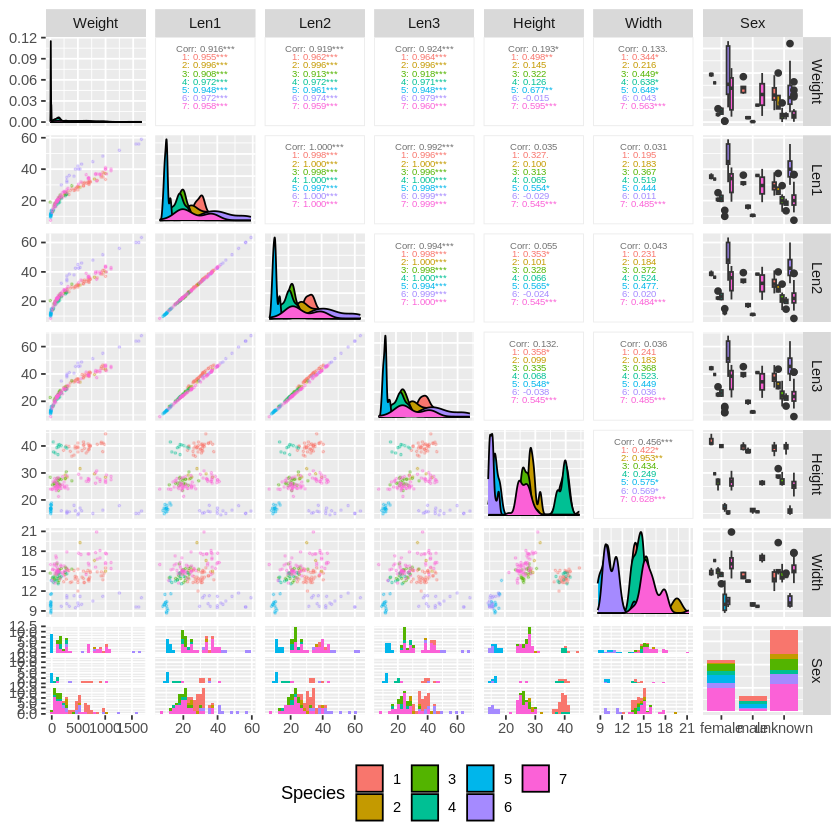

In [ ]:
options(jupyter.plot_scale=0.75)
options(warn=-1)

fish %>% ggpairs(., legend = 1, columns = 2:8,
                   aes(color = Species),
                   upper = list(continuous = wrap("cor", size=2)),
                   lower = list(continuous = wrap("points", alpha = 0.3,    size=0.4)))+                 
  theme(legend.position = "bottom") + 
  labs(color = "Engine Type")

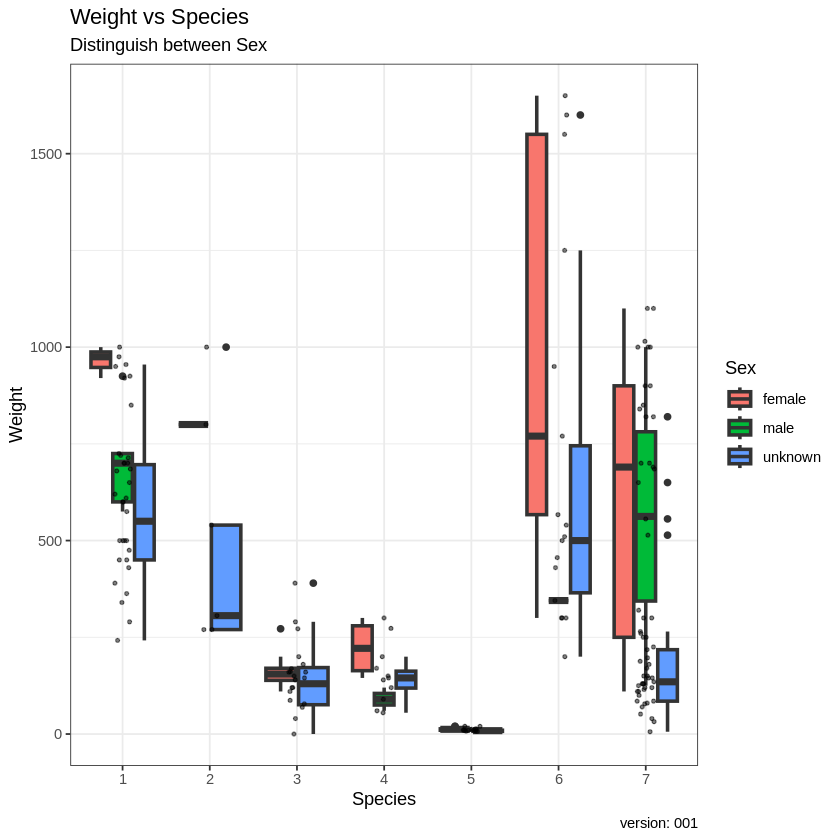

In [ ]:
plot1 <- ggplot(fish %>% mutate(Species = as.factor(Species)),
                         aes(x=Species, y=Weight, fill=Sex)) +
  geom_boxplot(size = 1, notch = F) +
  geom_jitter(aes(Species,Weight),
              position=position_jitter(width=0.1,height=0),
              alpha=0.5,
              size=0.8,
              show.legend=F)+
  labs(title="Weight vs Species", y="Weight", x="Species") +
  theme_bw() +  
  labs(title="Weight vs Species",
       subtitle="Distinguish between Sex",
       caption="version: 001") 
plot1

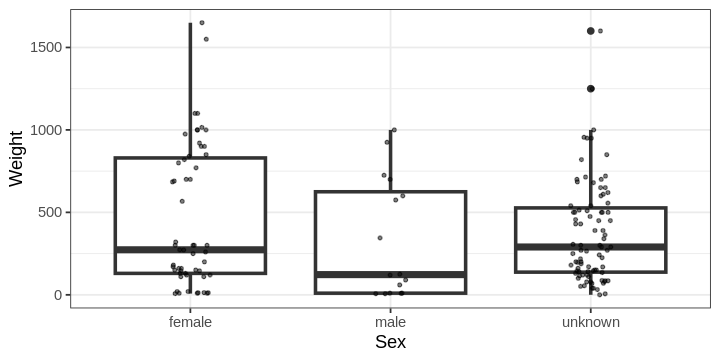

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(fish, aes(x=Sex, y=Weight)) +
  geom_boxplot(size = 1, notch = F) +
  geom_jitter(aes(Sex,Weight),
              position=position_jitter(width=0.1,height=0),
              alpha=0.5,
              size=0.8,
              show.legend=F)+
  theme_bw()  


# Your turn 01

* Recode Species, instead numeric use fish names.
* Which variables look promising, which variables can be omitted.
* Edit the dataset
* Plot Height vs. Weight, Leng3 vs. Weight, Width vs. Weight

# Regression


...

In [ ]:
summary(fish)

 Species     Weight            Len1            Len2            Len3      
 1:34    Min.   :   0.0   Min.   : 7.50   Min.   : 8.40   Min.   : 8.80  
 2: 6    1st Qu.: 120.0   1st Qu.:19.02   1st Qu.:21.00   1st Qu.:23.12  
 3:20    Median : 272.5   Median :25.10   Median :27.15   Median :29.35  
 4:11    Mean   : 398.7   Mean   :26.23   Mean   :28.39   Mean   :31.19  
 5:14    3rd Qu.: 650.0   3rd Qu.:32.70   3rd Qu.:35.75   3rd Qu.:39.67  
 6:17    Max.   :1650.0   Max.   :59.00   Max.   :63.40   Max.   :68.00  
 7:56                                                                    
     Height          Width            Sex    
 Min.   :14.50   Min.   : 8.70   female :55  
 1st Qu.:24.23   1st Qu.:13.40   male   :16  
 Median :27.00   Median :14.60   unknown:87  
 Mean   :28.26   Mean   :14.12               
 3rd Qu.:37.70   3rd Qu.:15.30               
 Max.   :44.50   Max.   :20.90               
                                             

In [ ]:
Fish <- fish %>%
  filter(Species %in% c(1,3,7)) %>%
  mutate(Species = recode(Species,"1" = "Bream",
                                  "2" = "Whitewish",
                                  "3" = "Roach",
                                  "4" = "Blicca",
                                  "5" = "Smelt",
                                  "6" = "Pike",
                                  "7" = "Perch")) %>%
  mutate(Species = fct_drop(Species))%>%                            
  select(-Sex) %>%
  filter(Weight != 0)
head(Fish)
summary(Fish)

,Species,Weight,Len1,Len2,Len3,Height,Width
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bream,242,23.2,25.4,30.0,38.4,13.4
2,Bream,290,24.0,26.3,31.2,40.0,13.8
3,Bream,340,23.9,26.5,31.1,39.8,15.1
4,Bream,363,26.3,29.0,33.5,38.0,13.3
5,Bream,430,26.5,29.0,34.0,36.6,15.1
6,Bream,450,26.8,29.7,34.7,39.2,14.2


  Species       Weight            Len1           Len2            Len3      
 Bream:34   Min.   :   5.9   Min.   : 7.5   Min.   : 8.40   Min.   : 8.80  
 Roach:19   1st Qu.: 140.0   1st Qu.:20.5   1st Qu.:22.00   1st Qu.:24.00  
 Perch:56   Median : 300.0   Median :25.4   Median :27.50   Median :30.60  
            Mean   : 419.5   Mean   :26.3   Mean   :28.57   Mean   :31.54  
            3rd Qu.: 690.0   3rd Qu.:31.9   3rd Qu.:35.00   3rd Qu.:39.30  
            Max.   :1100.0   Max.   :41.1   Max.   :44.00   Max.   :46.60  
     Height          Width     
 Min.   :21.30   Min.   :12.0  
 1st Qu.:25.60   1st Qu.:14.1  
 Median :27.60   Median :15.0  
 Mean   :30.48   Mean   :15.1  
 3rd Qu.:38.10   3rd Qu.:15.7  
 Max.   :44.50   Max.   :20.9  

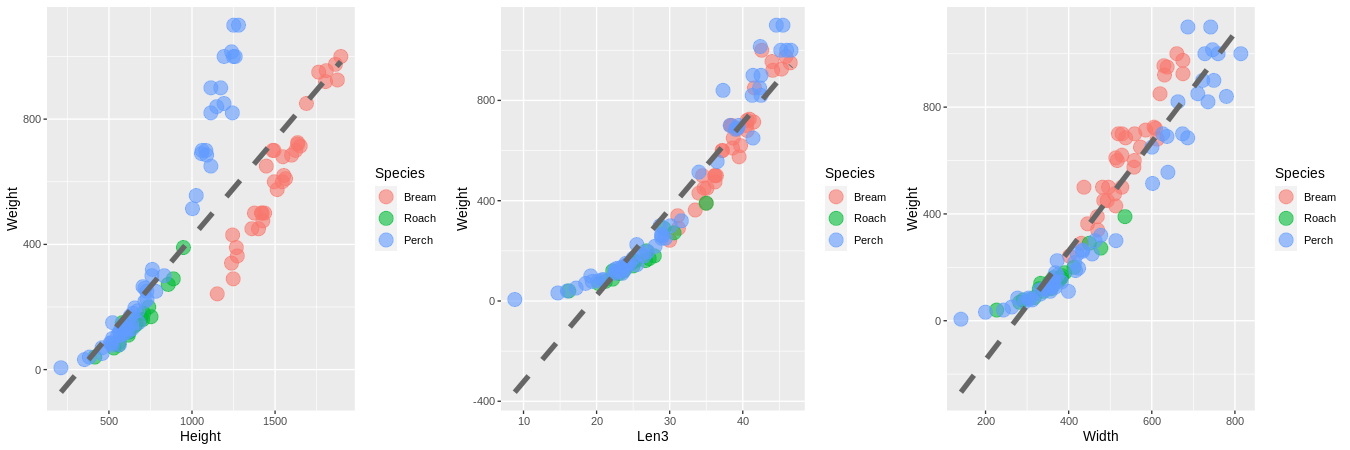

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 5, repr.plot.res = 90)

Fish <- Fish %>% mutate(Height = Height*Len3,
                        Width = Width*Len3)

Height_Weight <- ggplot(Fish,aes(x=Height,y=Weight,col=Species))+
                 geom_point(size=5,alpha=0.6)+
                 geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,formula="y~x")

LengthV_Weight <- ggplot(Fish,aes(x=Len3,y=Weight,col=Species))+
                  geom_point(size=5,alpha=0.6)+
                  geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,formula="y~x")

Width_Weight <- ggplot(Fish,aes(x=Width,y=Weight,col=Species))+
                 geom_point(size=5,alpha=0.6)+
                 geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,formula="y~x")

#Height_Weight
#LengthV_Weight
#Width_Weight

grid.arrange(Height_Weight, LengthV_Weight, Width_Weight, ncol = 3)

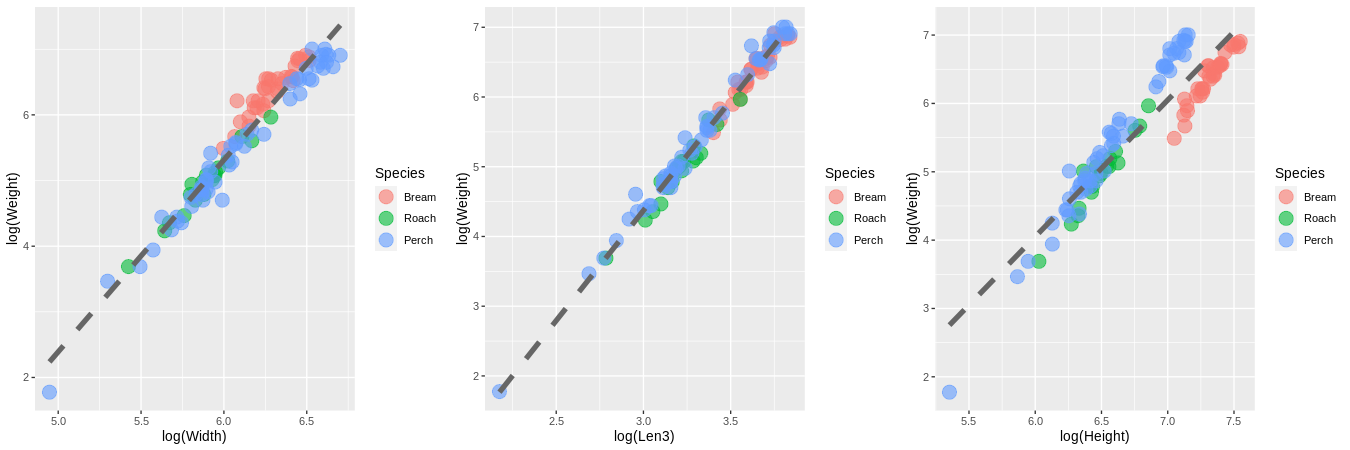

In [ ]:
Height_Weight_log <- ggplot(Fish,aes(x=log(Width),y=log(Weight),col=Species))+
                 geom_point(size=5,alpha=0.6)+
                 geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,,formula="y~x")

LengthV_Weight_log <- ggplot(Fish,aes(x=log(Len3),y=log(Weight),col=Species))+
                  geom_point(size=5,alpha=0.6)+
                  geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,,formula="y~x")

Width_Weight_log  <- ggplot(Fish,aes(x=log(Height),y=log(Weight),col=Species))+
                 geom_point(size=5,alpha=0.6)+
                 geom_smooth(col="grey40",method = "lm",se=F,lty="dashed",lwd=2,,formula="y~x")


grid.arrange(Height_Weight_log, LengthV_Weight_log, Width_Weight_log, ncol = 3)


In [ ]:
# Model with all variables and interaction till 2rd order ... 
m0  <- lm(Weight ~ (.)^2, data = Fish)
summary(m0)
# Ufff 


Call:
lm(formula = Weight ~ (.)^2, data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.562 -14.925  -0.473  15.115 110.903 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)          8.563e+02  8.013e+02   1.069   0.2884  
SpeciesRoach        -5.280e+02  7.649e+02  -0.690   0.4920  
SpeciesPerch        -7.280e+02  7.971e+02  -0.913   0.3638  
Len1                 4.511e+02  2.174e+02   2.075   0.0411 *
Len2                -3.404e+02  3.085e+02  -1.103   0.2731  
Len3                -9.995e+01  2.395e+02  -0.417   0.6775  
Height              -4.422e-01  1.443e+00  -0.306   0.7600  
Width               -1.233e-01  2.516e+00  -0.049   0.9610  
SpeciesRoach:Len1   -3.421e+02  1.752e+02  -1.952   0.0544 .
SpeciesPerch:Len1   -4.220e+02  1.898e+02  -2.224   0.0290 *
SpeciesRoach:Len2    2.812e+02  2.846e+02   0.988   0.3259  
SpeciesPerch:Len2    3.410e+02  3.183e+02   1.071   0.2873  
SpeciesRoach:Len3    3.039e+01  2.194e+02   0.139

### Quesions: 
* How can you interpret previous result?
* Comment and discussion: how to select model.


In [ ]:
m0_BIC  <- stepAIC(m0, k=log(dim(Fish)[1]))

m0_AIC  <- stepAIC(m0)
summary(m0_BIC)
summary(m0_AIC)

Start:  AIC=907.86
Weight ~ (Species + Len1 + Len2 + Len3 + Height + Width)^2

                 Df Sum of Sq    RSS    AIC
- Species:Len3    2      68.3 135368 898.53
- Species:Height  2     118.2 135418 898.58
- Species:Width   2     406.7 135706 898.81
- Species:Len2    2    1942.9 137242 900.03
- Len3:Height     1      24.4 135324 903.19
- Len1:Len2       1      49.7 135349 903.21
- Len3:Width      1      73.9 135373 903.23
- Len1:Len3       1     110.2 135410 903.26
- Len2:Len3       1     139.4 135439 903.28
- Len2:Height     1    1103.1 136403 904.06
- Height:Width    1    1273.6 136573 904.19
- Len2:Width      1    1903.5 137203 904.69
- Species:Len1    2    8382.3 143682 905.03
- Len1:Width      1    3275.6 138575 905.78
- Len1:Height     1    4640.7 139940 906.85
<none>                        135300 907.86

Step:  AIC=898.53
Weight ~ Species + Len1 + Len2 + Len3 + Height + Width + Species:Len1 + 
    Species:Len2 + Species:Height + Species:Width + Len1:Len2 + 
    Len1:Len3 + 


Call:
lm(formula = Weight ~ Species + Len1 + Len2 + Height + Width + 
    Species:Len2 + Len1:Height, data = Fish)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.729  -15.507   -1.309   12.546  119.418 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.811e+02  1.233e+02   3.900 0.000175 ***
SpeciesRoach      -3.029e+02  1.127e+02  -2.688 0.008437 ** 
SpeciesPerch      -4.134e+02  8.887e+01  -4.652 1.02e-05 ***
Len1              -1.814e+01  1.838e+01  -0.987 0.326110    
Len2              -1.338e+01  1.793e+01  -0.746 0.457303    
Height            -4.307e-01  1.141e-01  -3.774 0.000274 ***
Width              5.353e-01  1.338e-01   4.001 0.000122 ***
SpeciesRoach:Len2  1.297e+01  4.255e+00   3.048 0.002956 ** 
SpeciesPerch:Len2  1.840e+01  3.073e+00   5.988 3.43e-08 ***
Len1:Height        3.210e-02  2.362e-03  13.591  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3


Call:
lm(formula = Weight ~ Species + Len1 + Len2 + Len3 + Height + 
    Width + Species:Len1 + Species:Len2 + Len1:Height + Len1:Width + 
    Len2:Height + Len2:Width, data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.607 -15.480  -0.082  14.821 125.049 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)        462.2684   242.3672   1.907   0.0596 .
SpeciesRoach      -276.5809   231.9297  -1.193   0.2361  
SpeciesPerch      -381.6482   233.1339  -1.637   0.1050  
Len1               282.4855   157.0292   1.799   0.0753 .
Len2              -315.8125   150.3942  -2.100   0.0384 *
Len3                25.3279    17.3784   1.457   0.1484  
Height              -0.3628     0.3283  -1.105   0.2720  
Width                0.1973     0.5619   0.351   0.7263  
SpeciesRoach:Len1 -226.0998   135.3913  -1.670   0.0983 .
SpeciesPerch:Len1 -281.0610   138.0202  -2.036   0.0446 *
SpeciesRoach:Len2  220.5264   128.6759   1.714   0.0899 .
SpeciesPerch

In [ ]:
install.packages("leaps")
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



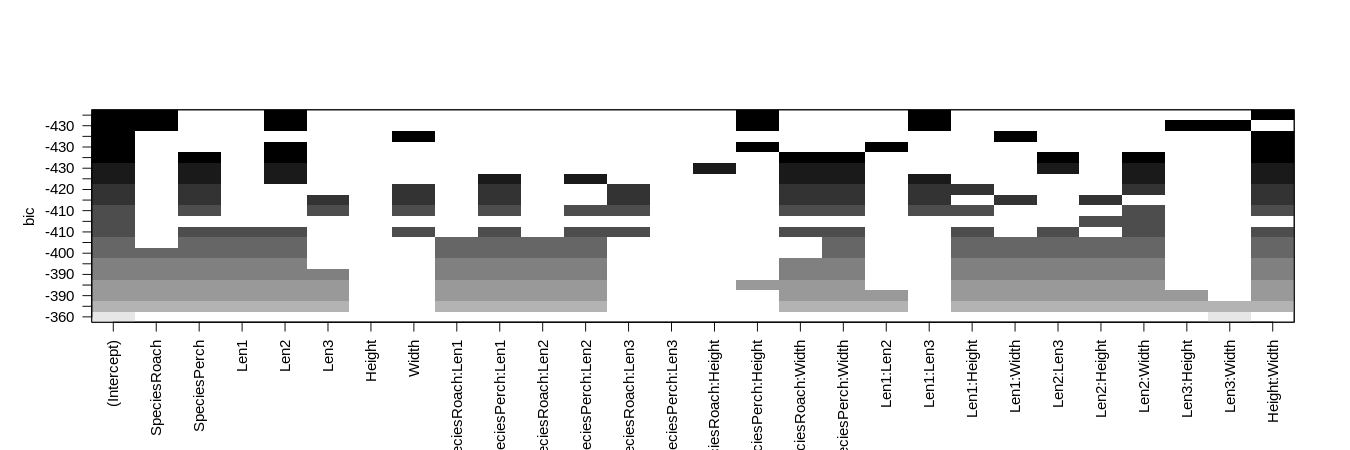

In [ ]:
best_subset <- regsubsets(Weight ~ (.)^2, Fish, nvmax = 20,really.big=T)
results <- summary(best_subset)
plot(best_subset)


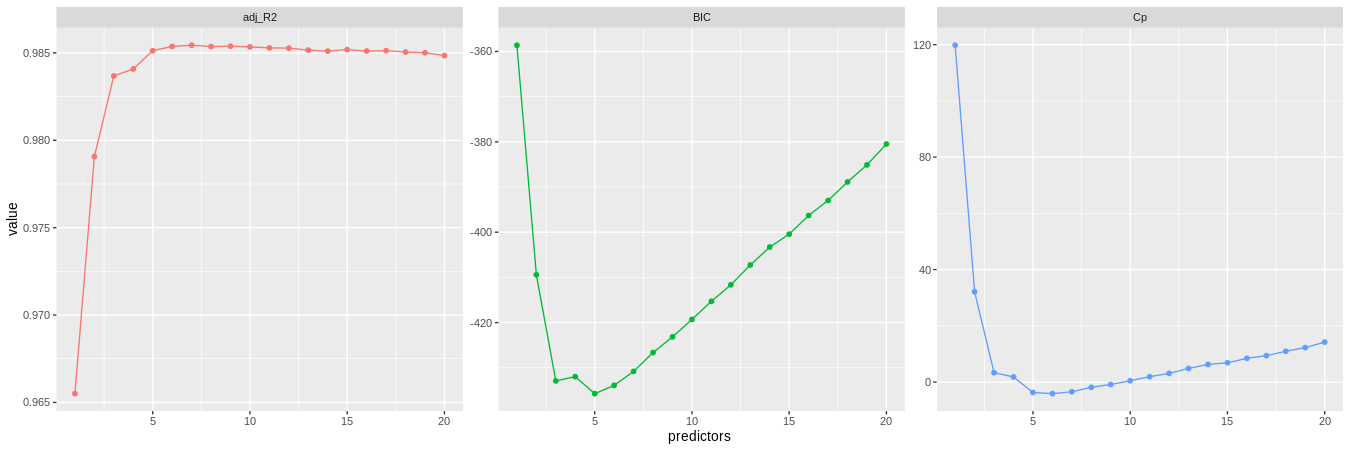

In [ ]:
#  plot results
# source: https://afit-r.github.io/model_selection
tibble(predictors = 1:20,
       adj_R2 = results$adjr2,
       Cp = results$cp,
       BIC = results$bic) %>%
  gather(statistic, value, -predictors) %>%
  ggplot(aes(predictors, value, color = statistic)) +
  geom_line(show.legend = F) +
  geom_point(show.legend = F) +
  facet_wrap(~ statistic, scales = "free")

# Your turn 02

* Is there problem with multicolinearity? If so, how can we cope with it.
* Try to find such a good model (based on adjuste R^2) with a maximum of 7 covariates. 

Hint: try to use expert knowledge.


In [ ]:
m1 <- lm(Weight ~ (.), data = Fish)
summary(m1)


Call:
lm(formula = Weight ~ (.), data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-139.69  -41.71  -13.77   35.64  282.25 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -789.1469   117.0209  -6.744 9.79e-10 ***
SpeciesRoach  222.2885    81.6941   2.721  0.00767 ** 
SpeciesPerch  254.2909   113.2402   2.246  0.02691 *  
Len1            4.0467    32.5372   0.124  0.90127    
Len2           22.4708    43.6348   0.515  0.60770    
Len3          -21.3108    29.7990  -0.715  0.47617    
Height          0.6927     0.1288   5.377 4.89e-07 ***
Width           0.5727     0.2189   2.616  0.01025 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 72 on 101 degrees of freedom
Multiple R-squared:  0.9523,	Adjusted R-squared:  0.949 
F-statistic: 288.4 on 7 and 101 DF,  p-value: < 2.2e-16


In [ ]:
# VIF
1/(1-(summary(lm(Len1 ~.,data = Fish %>% select(-Weight)))$r.squared))
1/(1-(summary(lm(Len2 ~.,data = Fish %>% select(-Weight)))$r.squared))
1/(1-(summary(lm(Len3 ~.,data = Fish %>% select(-Weight)))$r.squared))
1/(1-(summary(lm(Height ~.,data = Fish %>% select(-Weight)))$r.squared))
1/(1-(summary(lm(Width  ~.,data = Fish %>% select(-Weight)))$r.squared))

[1] 1195.547

[1] 2465.661

[1] 1453.963

[1] 64.14466

[1] 21.9837

In [ ]:
kappa(scale(data.matrix(Fish)))
kappa(scale(data.matrix(Fish %>% select(-Len1,-Len2))))

[1] 77.29541

[1] 11.7315

In [ ]:
m1 <- lm(Weight ~ Species+Len2:Len3:Height+Len2:Len3:Width, data = Fish)
summary(m1)


Call:
lm(formula = Weight ~ Species + Len2:Len3:Height + Len2:Len3:Width, 
    data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-153.42  -14.75   -3.83   11.67  150.46 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.685e+01  2.214e+01   1.664 0.099088 .  
SpeciesRoach     -3.993e+01  2.356e+01  -1.695 0.093012 .  
SpeciesPerch     -3.004e+01  2.336e+01  -1.286 0.201328    
Len2:Len3:Height  9.174e-05  2.654e-05   3.457 0.000793 ***
Len2:Len3:Width   5.618e-04  4.924e-05  11.408  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 44.84 on 104 degrees of freedom
Multiple R-squared:  0.981,	Adjusted R-squared:  0.9802 
F-statistic:  1340 on 4 and 104 DF,  p-value: < 2.2e-16


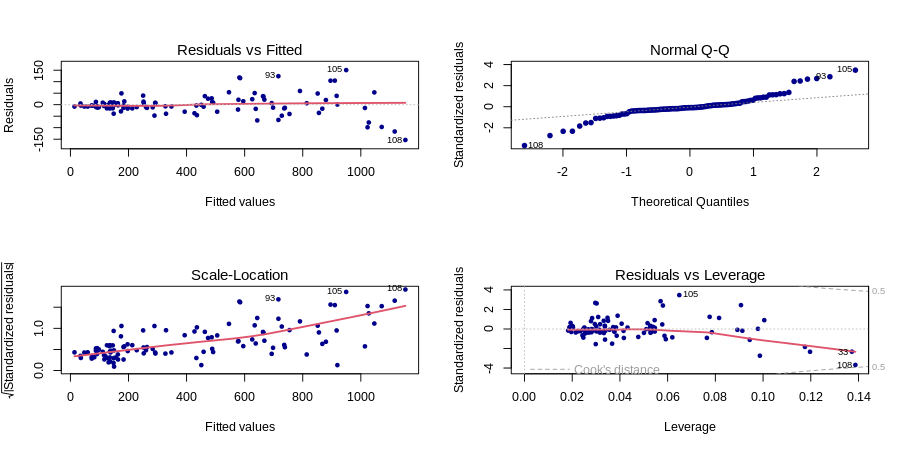

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 90)

par(mfrow = c(2, 2))
plot(m1, pch = 20, col = "blue4", lwd = 2)


In [ ]:
log_m1 <- lm(log(Weight) ~ Species+Len2:Len3:Height+Len2:Len3:Width, data = Fish)
summary(log_m1)


Call:
lm(formula = log(Weight) ~ Species + Len2:Len3:Height + Len2:Len3:Width, 
    data = Fish)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64423 -0.09038  0.07184  0.20479  0.58785 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       5.275e+00  1.989e-01  26.521  < 2e-16 ***
SpeciesRoach     -7.610e-01  2.116e-01  -3.596 0.000496 ***
SpeciesPerch     -8.776e-01  2.099e-01  -4.182 6.05e-05 ***
Len2:Len3:Height -4.205e-07  2.384e-07  -1.764 0.080719 .  
Len2:Len3:Width   2.714e-06  4.424e-07   6.136 1.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4028 on 104 degrees of freedom
Multiple R-squared:  0.8383,	Adjusted R-squared:  0.8321 
F-statistic: 134.8 on 4 and 104 DF,  p-value: < 2.2e-16


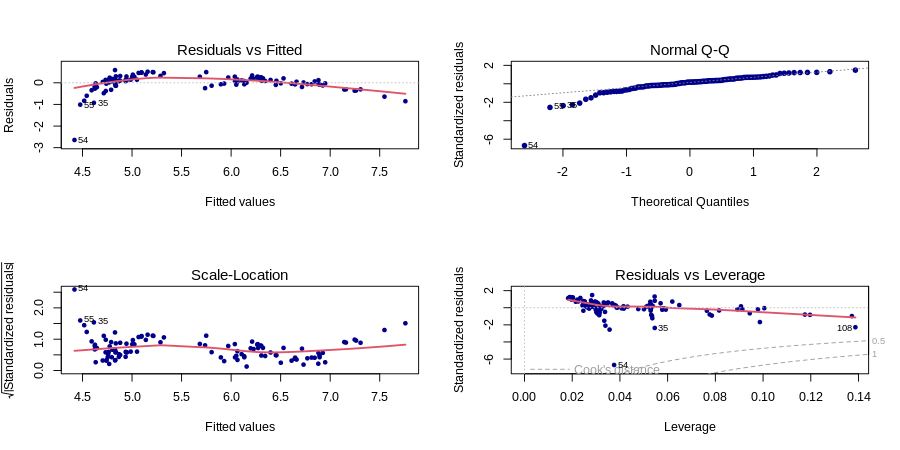

In [ ]:
par(mfrow = c(2, 2))
plot(log_m1, pch = 20, col = "blue4", lwd = 2)


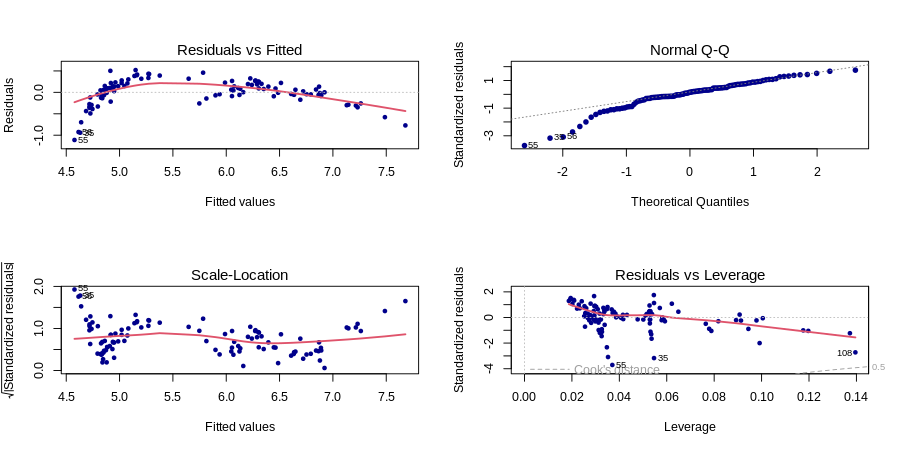

In [ ]:
log_m1 <- lm(log(Weight) ~ Species+Len2:Len3:Height+Len2:Len3:Width, data = Fish[-54,])
par(mfrow = c(2, 2))
plot(log_m1, pch = 20, col = "blue4", lwd = 2)



Call:
lm(formula = Weight ~ Species + I(Len3^2) + Len3:Height:Width, 
    data = Fish)

Residuals:
     Min       1Q   Median       3Q      Max 
-135.173  -26.380   -2.365   17.590  149.566 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.797e+02  1.737e+01 -10.347  < 2e-16 ***
SpeciesRoach       7.533e+01  1.695e+01   4.444 2.21e-05 ***
SpeciesPerch       1.104e+02  1.290e+01   8.559 1.09e-13 ***
I(Len3^2)          2.933e-01  3.576e-02   8.202 6.65e-13 ***
Len3:Height:Width  1.112e-05  1.366e-06   8.145 8.89e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 46.27 on 104 degrees of freedom
Multiple R-squared:  0.9797,	Adjusted R-squared:  0.979 
F-statistic:  1257 on 4 and 104 DF,  p-value: < 2.2e-16


[1] 0.88

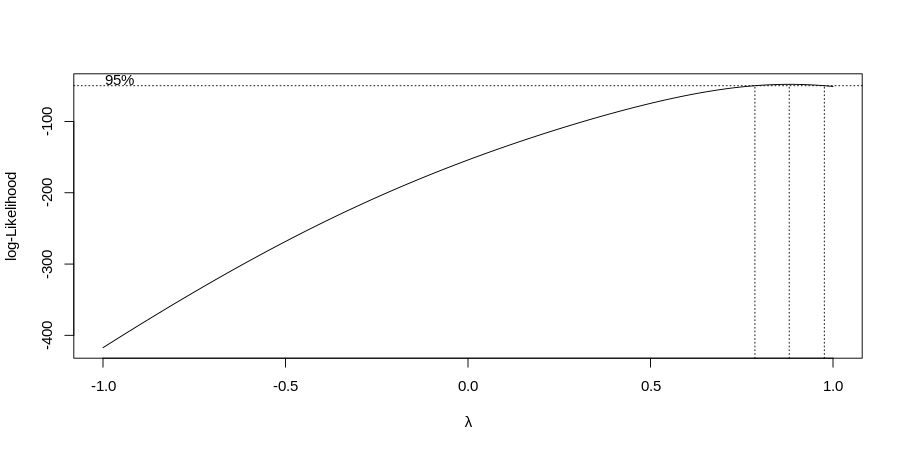

In [ ]:
# Box-Cox transformation
BC_m0  <- lm(Weight ~ Species+I(Len3^2) +Len3:Height:Width, data = Fish)
summary(BC_m0)
bc     <- boxcox(m1, lambda = seq(-1,1 , 1/100))
lambda <- bc$x[which.max(bc$y)]
lambda


Call:
lm(formula = Weight^(1/2) ~ Species + I(Len3^2) + Len3:Height + 
    Len3:Width, data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5110 -0.5771  0.0654  0.5473  2.4680 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.329e+00  7.166e-01   7.437 3.18e-11 ***
SpeciesRoach -1.443e+00  7.208e-01  -2.002  0.04787 *  
SpeciesPerch -1.127e+00  7.384e-01  -1.527  0.12987    
I(Len3^2)     4.584e-03  1.718e-03   2.668  0.00887 ** 
Len3:Height   1.967e-05  3.543e-05   0.555  0.58000    
Len3:Width    5.364e-04  8.299e-05   6.464 3.46e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.069 on 103 degrees of freedom
Multiple R-squared:  0.9833,	Adjusted R-squared:  0.9825 
F-statistic:  1213 on 5 and 103 DF,  p-value: < 2.2e-16



Call:
lm(formula = Weight^(1/2) ~ Species + I(Len3^2) + Len3:Height + 
    Len3:Width, data = Fish)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5110 -0.5771  0.0654  0.5473  2.4680 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.329e+00  7.166e-01   7.437 3.18e-11 ***
SpeciesRoach -1.443e+00  7.208e-01  -2.002  0.04787 *  
SpeciesPerch -1.127e+00  7.384e-01  -1.527  0.12987    
I(Len3^2)     4.584e-03  1.718e-03   2.668  0.00887 ** 
Len3:Height   1.967e-05  3.543e-05   0.555  0.58000    
Len3:Width    5.364e-04  8.299e-05   6.464 3.46e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.069 on 103 degrees of freedom
Multiple R-squared:  0.9833,	Adjusted R-squared:  0.9825 
F-statistic:  1213 on 5 and 103 DF,  p-value: < 2.2e-16


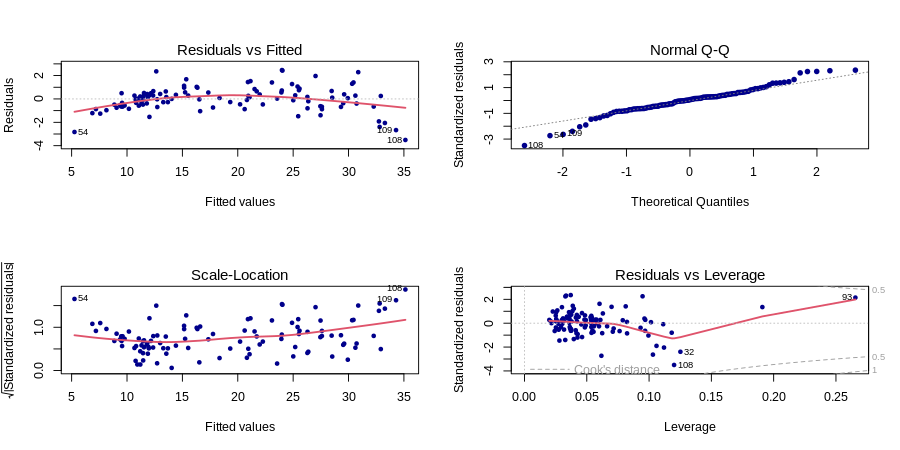

In [ ]:
BC_m1 <- lm(Weight^(1/2) ~ Species+I(Len3^2) + Len3:Height+Len3:Width, data = Fish)
summary(BC_m1)

#Fish$Weight_lambda = (Fish$Weight^lambda-1)/lambda
#BC_m1 <- lm(Weight_lambda  ~ Species+I(Len3^2) + Len3:Height+Len3:Width, data = Fish)

summary(BC_m1)
par(mfrow = c(2, 2))
plot(BC_m1, pch = 20, col = "blue4", lwd = 2)


In [ ]:
#install.packages("pbkrtest")
#install.packages("lme4")
#install.packages("RcppEigen")
#install.packages("car")
#library(car)


Call:
lm(formula = log(Weight) ~ Species + log(Len3) * log(Height) * 
    log(Width), data = Fish[-54, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.217732 -0.047811 -0.005844  0.044970  0.218922 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       92.43708   31.61123   2.924 0.004290 ** 
SpeciesRoach                       0.22712    0.07678   2.958 0.003883 ** 
SpeciesPerch                       0.33221    0.08228   4.038 0.000107 ***
log(Len3)                        -25.98251    9.08072  -2.861 0.005158 ** 
log(Height)                      -17.01614    5.48692  -3.101 0.002517 ** 
log(Width)                       -15.10406    5.30318  -2.848 0.005359 ** 
log(Len3):log(Height)              4.86326    1.49576   3.251 0.001575 ** 
log(Len3):log(Width)               4.22775    1.38694   3.048 0.002959 ** 
log(Height):log(Width)             2.78462    0.90736   3.069 0.002779 ** 
log(Len3):log(


Call:
lm(formula = log(Weight) ~ Species + log(Len3) * log(Height) * 
    log(Width), data = Fish[-54, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.217732 -0.047811 -0.005844  0.044970  0.218922 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       92.43708   31.61123   2.924 0.004290 ** 
SpeciesRoach                       0.22712    0.07678   2.958 0.003883 ** 
SpeciesPerch                       0.33221    0.08228   4.038 0.000107 ***
log(Len3)                        -25.98251    9.08072  -2.861 0.005158 ** 
log(Height)                      -17.01614    5.48692  -3.101 0.002517 ** 
log(Width)                       -15.10406    5.30318  -2.848 0.005359 ** 
log(Len3):log(Height)              4.86326    1.49576   3.251 0.001575 ** 
log(Len3):log(Width)               4.22775    1.38694   3.048 0.002959 ** 
log(Height):log(Width)             2.78462    0.90736   3.069 0.002779 ** 
log(Len3):log(

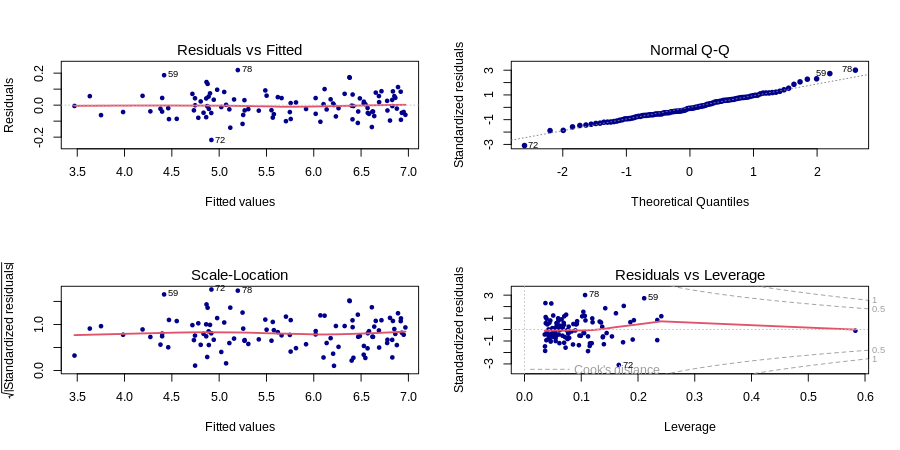

In [ ]:
m_f <- lm(log(Weight) ~ Species+log(Len3)*log(Height)*log(Width), data = Fish[-54,])
summary(m_f)

#Fish$Weight_lambda = (Fish$Weight^lambda-1)/lambda
#BC_m1 <- lm(Weight_lambda  ~ Species+I(Len3^2) + Len3:Height+Len3:Width, data = Fish)

summary(m_f)
par(mfrow = c(2, 2))
plot(m_f, pch = 20, col = "blue4", lwd = 2)


Is linear regression clear?

# Let's start with GLM

##  Necessary theory recap from Lectures 01-03

Let's consider (m1):
  1. realization $(y_i,\ldots,y_n)$ of $iid$ random variables $Y_1,\ldots,Y_n$ with probability density function $f(y;\theta;\phi)$ from an exponential family of probability distributions
  $$f(y;\theta;\phi) = exp\left(\frac{y \theta - b(\theta)}{a(\phi)} - c(y,\phi)\right),$$
  where conditions of regularity are fulfilled (one dimensional case, i.e. $y_i,\theta_i \in R, a(\phi) >0, \phi >0)$.
  2. Regression matrix $X$ and vector of unknown parameters $\beta$, linear predictor $η = X \beta$
  3. A link function $g(x)$
  $$\eta_i = g(\mu_i) = x_i^T \beta, \ \text{where} \ \mu_i = E[Y_i] \ \ i = 1,\ldots,n$$

The dispersion $a(\phi)$ is typically known. If not, we take it as nuisance parameter.

Link function satisfying $g(\mu_i) = \theta_i$ is called canonical.

For $b(\theta) \in C^2$ we showed:
$$E[Y] = b'(\theta) $$
$$V[Y] = a(\phi) b''(\theta) $$
and defined variance function $v(\mu) = \frac{\partial \mu}{\partial \theta}$, i.e. $V[Y] = a(\phi) v(\mu)$

Relations:

$$
\beta \xrightarrow[]{\eta_i = x_i^T\beta} \eta
\xrightarrow[]{\mu_i = g^{-1}(\eta_i)}  \mu
\xrightarrow[]{\theta_i = (b')^{-1}(\mu_i)}  \theta
$$ 

Inverse relatiions
$$
\eta_i 
\xleftarrow[]{}  \mu
\xleftarrow[]{}  \theta
$$ 


**Lemma**:
Let Y have an exponential type distribution with density given in m1, where $b(\theta)$ is 2 times continuously differentiable, then there exists a everywhere finite moment generating function $M_Y(t) = E[e^{ty}]$ that is 2 times differentiable at 0 and it holds:
* $E[Y] = b'(\theta)$ 
* $V[Y] = a(\phi) b''(\theta)$

## HW 01

Compute $E[Y]$, $V[Y]$, and $v(Y)$ by the help of moment generating function theory for the following disributions:
* Normal: $N(\mu,\sigma^2)$
* Poisson: $Poi(\lambda)$
* Bernoulli: $Ber(p)$
* Gamma: $\Gamma[a,p]$
* Inverse: Gaussian $IG[\mu, \lambda]$


Questions:
* Which distributions can fulfill homoscedasticity?
* For which distribution the variance increases with the square of the mean value?
* Does exists a distribution, where $V[Y] = k \cdot \mu$ ?


## Solution



####  Normal: $N(\mu,\sigma^2)$
$f(y, \mu, \sigma^2) = \frac{1}{\sqrt {{(2\pi )} \sigma^2}}  {\mathrm {e}}^-{\frac{{\left(y- \mu \right)}^{T}{\left( y-\mu \right)}}{\sigma^2}} = {\mathrm {e}}^{\frac{y \mu - \frac{\mu^2}{2}}{\sigma^2} - \left(  \frac{y^2}{2\sigma^2} + \frac{1}{2} ln(2 \pi \sigma^2) \right)}$

* $\theta = \mu  \Rightarrow b(\theta) = \frac{\mu^2}{2}$
* $\phi = \sigma^2 ⇒ a(\phi) = \sigma^2$
*  $E[Y] = b'(\theta) = \mu$
* $V[Y] = \sigma^2 b''(\theta)= \sigma^2 $

Linear variance function: $v(\mu) = 1$





####  Poisson: $Poi(\lambda)$

$f(x,\lambda) = \frac{\lambda^x e^{-\lambda}}{x!} = exp(x ln(\lambda)  -\lambda -ln(x!)) $

* $\theta = ln(\lambda) \Rightarrow b(\theta) = e^{\theta}  \ \text{and} \  \phi = 1$
*  $E[Y] = b'(\theta) = e^{\theta} = \lambda$
* $V[Y] = b''(\theta)=e^{\theta} = \lambda$

Linear variance function: $v(\mu) = \mu$




####  Bernoulli: $Ber(p)$

$f(y,p) = p^y(1-p)^{1-y} = \textrm{exp}(y\textrm{ln}(p))+(1-y)\textrm{ln}(1-p)=\textrm{exp}(y\textrm{ln}(\frac{p}{1-p}))+\textrm{ln}(1-p)$

* $\phi = 1$, $b(\theta) = \textrm{ln}(1+e^{θ})$, $\theta = \textrm{ln}(\frac{p}{1+p})\implies p=\frac{e^{θ}}{1+e^{θ}}$
* $E[Y] = b'(\theta) = \frac{e^{θ}}{1+e^{θ}} = λ$
* $V[Y] = b''(\theta) = \frac{e^{θ}}{(1+e^{θ})^2}$

Linear variance function: $v(\mu)=\frac{e^{θ}}{(1+e^{θ})^2} = k\cdot\mu$, where $k=\frac{1}{1+e^{θ}}$

####  Gamma: $\Gamma[α,\beta]$


$f(y,\alpha,\beta) = {\frac {y^{\alpha -1}e^{-\beta y}\beta ^{\alpha }}{\Gamma (\alpha )}}$, kde $y>0$ a $\alpha ,\beta >0$

Dále označme $\beta=\frac{\alpha}{p}$, pak:
$
\begin{aligned}
f(y,\alpha,p) &= \textrm{exp}\Bigl[\textrm{ln}\bigl(f(y,\alpha,p)\bigr)\Bigr]=\textrm{exp}\Bigl[\alpha\textrm{ln}(\alpha)-\alpha\textrm{ln}(p)+(\alpha-1)\textrm{ln}(y)-\textrm{ln}\bigl(Γ(\alpha)\bigr)-\frac{\alpha}{p}y\Bigr]=\\
&=\textrm{exp}\Biggl[\frac{\Bigl(-\frac{1}{p}\Bigr)y-\textrm{ln}(p)}{\frac{1}{\alpha}}+\alpha\textrm{ln}(\alpha)+(\alpha-1)\textrm{ln}(y)-\textrm{ln}\bigl(Γ(\alpha)\bigr)\Biggr]\\
\end{aligned}
$

$
\begin{align*}
θ =-\frac{1}{p}, \qquad \phi=\frac{1}{\alpha}, \qquad b(θ) &= \textrm{ln}(p)=\textrm{ln}\Bigl(-\frac{1}{θ}\Bigr)=-\textrm{ln}(-θ), \\
a(\phi) &= \phi, \\
c(y,\phi) &= \frac{1}{\phi}\textrm{ln}\Bigl(\frac{1}{\phi}\Bigr)+\Bigl(\frac{1}{\phi}-1\Bigr)\textrm{ln}(y)-\textrm{ln}\biggl(Γ\Bigl(\frac{1}{\phi}\Bigr)\biggr)
\end{align*}
$

* $E[Y] = b'(\theta) = -\frac{1}{θ}=\mu$
* $V[Y] = a(\phi)\cdot b''(\theta) = \frac{\phi}{θ^2}$

Linear variance function: $v(\mu) =\frac{1}{θ^2}= \mu^2$

####  Inverse Gaussian $IG[\mu, \lambda]$

$$
\begin{aligned}
f(y;\mu,\lambda )&=\sqrt{\frac{\lambda}{2\pi y^{3}}} \exp {\biggl (}-{\frac {\lambda (y-\mu )^{2}}{2\mu ^{2}y}}{\biggr )}=\exp\biggl(\frac{1}{2}\textrm{ln}\Bigl(\frac{\lambda}{2\pi y^3}\Bigr)-\lambda\Bigl(\frac{y}{2\mu^2}-\frac{1}{\mu}+\frac{1}{2y}\Bigr)\biggr)= \\
&=\exp\Biggl(\frac{y\cdot\Bigl(\frac{1}{2\mu^2}\Bigr)-\frac{1}{\mu}}{-\frac{1}{\lambda}}+\frac{1}{2}\Bigl(-\frac{\lambda}{y}+\textrm{ln}\lambda-\textrm{ln}2\pi-3\textrm{ln}y\Bigr)\Biggr)
\end{aligned}
$$


$
\begin{align*}
θ =\frac{1}{2\mu^2}, \qquad \phi=\lambda, \qquad b(θ) &= \frac{1}{\mu}=\sqrt{2\theta}, \\
a(\phi) &= -\frac{1}{\phi}, \\
c(y,\phi) &= \frac{1}{2}\Bigl(-\frac{\phi}{y}+\textrm{ln}\phi-\textrm{ln}2\pi-3\textrm{ln}y\Bigr)
\end{align*}
$

* $E[Y] = b'(\theta) = \frac{1}{\sqrt{2\theta}}=\mu_1$
* $V[Y] = a(\phi)\cdot b''(\theta) = \frac{1}{\phi\left(\sqrt{2\theta}\right)^{3}}$

Linear variance function: $v(\mu_1) = \frac{1}{\left(\sqrt{2\theta}\right)^{3}} = \mu_1^3$

Homoskedasticita: normální rozdělení, 